In [21]:
# importar librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)

sns.set()

import statsmodels.api as sm

1. Cargar dataset

In [22]:
df = pd.read_csv("../data/raw/internal-link(5).csv")
df.head()

 # o el nombre que tenga en tu carpeta

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


2. Exploración rápida

In [23]:
df.shape
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


,count,mean,std,min,25%,50%,75%,max
fips,3140.0,30401.640764,15150.559265,1001.0,18180.500000,29178.000000,45081.50000,5.604500e+04
TOT_POP,3140.0,104189.412420,333583.395432,88.0,10963.250000,25800.500000,67913.00000,1.010552e+07
0-9,3140.0,12740.302866,41807.301846,0.0,1280.500000,3057.000000,8097.00000,1.208253e+06
0-9 y/o % of total pop,3140.0,11.871051,2.124081,0.0,10.594639,11.802727,12.95184,2.546068e+01
19-Oct,3140.0,13367.976752,42284.392134,0.0,1374.500000,3274.000000,8822.25000,1.239139e+06
...,...,...,...,...,...,...,...,...
CKD_prevalence,3140.0,3.446242,0.568059,1.8,3.100000,3.400000,3.80000,6.200000e+00
CKD_Lower 95% CI,3140.0,3.207516,0.527740,1.7,2.900000,3.200000,3.50000,5.800000e+00
CKD_Upper 95% CI,3140.0,3.710478,0.613069,1.9,3.300000,3.700000,4.10000,6.600000e+00
CKD_number,3140.0,2466.234076,7730.422067,3.0,314.750000,718.000000,1776.25000,2.377660e+05


In [24]:
# mirar si hay nulos en las columnas que vamos a usar
cols_interes = [
    "diabetes_prevalence",
    "Obesity_prevalence",
    "Heart disease_prevalence",
    "COPD_prevalence",
    "CKD_prevalence",
    "Percent of Population Aged 60+"
]

df[cols_interes].isna().sum()


diabetes_prevalence               0
Obesity_prevalence                0
Heart disease_prevalence          0
COPD_prevalence                   0
CKD_prevalence                    0
Percent of Population Aged 60+    0
dtype: int64

In [25]:
#Si hay pocos nulos, podemos quitarlos
df_model = df[cols_interes].dropna()
df_model.shape


(3140, 6)

3. Regresión lineal simple
y = diabetes_prevalence
X = Obesity_prevalence

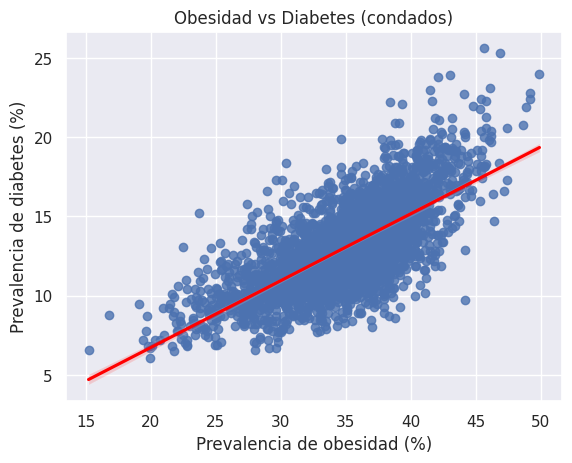

In [26]:
# 3.1.grafico
sns.regplot(
    x="Obesity_prevalence",
    y="diabetes_prevalence",
    data=df_model,
    line_kws={"color": "red"}
)

plt.title("Obesidad vs Diabetes (condados)")
plt.xlabel("Prevalencia de obesidad (%)")
plt.ylabel("Prevalencia de diabetes (%)")
plt.show()


In [27]:
# 3.2. Preparar X, y
X = df_model[["Obesity_prevalence"]]   # DataFrame (2D)
y = df_model["diabetes_prevalence"]    # Serie (1D)


In [28]:
# 3.3. Train / test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [29]:
# 3.4. Entrenar modelo lineal
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [30]:
# 3.5. Ver coeficientes (ecuación del modelo)
pendiente = lin_reg.coef_[0]
intercepto = lin_reg.intercept_

print("Ecuación del modelo:")
print(f"diabetes_prevalence = {intercepto:.3f} + {pendiente:.3f} * Obesity_prevalence")


Ecuación del modelo:
diabetes_prevalence = -1.535 + 0.416 * Obesity_prevalence


In [31]:
# 3.6. Predicciones y métricas
y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("MAPE:", mape)
print("R2:", r2)


MSE: 4.022620643451244
MAE: 1.5754700648265567
MAPE: 0.12194474874385941
R2: 0.49987011724455266


4. Regresión múltiple (varias X)

Ahora copiamos la idea del profe con más variables:

Usaremos como predictores:

Obesity_prevalence

Heart disease_prevalence

COPD_prevalence

CKD_prevalence

Percent of Population Aged 60+

In [32]:
# 4.1. Definir X e y
features = [
    "Obesity_prevalence",
    "Heart disease_prevalence",
    "COPD_prevalence",
    "CKD_prevalence",
    "Percent of Population Aged 60+"
]

X = df_model[features]
y = df_model["diabetes_prevalence"]


In [33]:
# StatsModels
import statsmodels.api as sm

# StatsModels requiere añadir la constante manualmente
X_sm = sm.add_constant(X)  # # Añadir intercepto

# Modelo OLS
model = sm.OLS(y, X_sm)
results = model.fit()

# Aquí va lo que preguntas:
print(results.summary())


                             OLS Regression Results                            
Dep. Variable:     diabetes_prevalence   R-squared:                       0.929
Model:                             OLS   Adj. R-squared:                  0.929
Method:                  Least Squares   F-statistic:                     8248.
Date:                 Tue, 25 Nov 2025   Prob (F-statistic):               0.00
Time:                         21:43:37   Log-Likelihood:                -3440.9
No. Observations:                 3140   AIC:                             6894.
Df Residuals:                     3134   BIC:                             6930.
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
co

El summary() solo se usa cuando haces una regresión clásica con StatsModels, no con scikit-learn.
Tabla de coeficientes

Filas (variables):

const → el intercepto (valor de diabetes si todas las X fueran 0).

Obesity_prevalence

Heart disease_prevalence

COPD_prevalence

CKD_prevalence

Percent of Population Aged 60+

Columnas importantes:

coef → cuánto cambia diabetes_prevalence cuando esa variable sube 1 unidad, manteniendo las demás fijas.

std err → error estándar del coeficiente.

t → estadístico t (coef / std err).

P>|t| → p-valor: indica si la variable es estadísticamente significativa.

[0.025 0.975] → intervalo de confianza al 95% del coeficiente.

Frases que puedes decir en la defensa usando ese summary

############################################################################################################################################################

Sobre el modelo en general

“He ajustado un modelo de regresión lineal múltiple con StatsModels y he obtenido el summary, que me da un informe completo sobre el ajuste del modelo.”

Sobre los coeficientes

“Cada fila de la tabla corresponde a una variable del modelo, y la columna coef indica cuánto cambia la prevalencia de diabetes cuando esa variable aumenta una unidad, manteniendo las demás constantes.”

Ejemplo concreto (adáptalo si tu coef cambia un poco):

“Por ejemplo, el coeficiente de Obesity_prevalence es positivo, lo que indica que a mayor prevalencia de obesidad, mayor prevalencia de diabetes en el condado.”

Sobre la significancia (p-valor)

“La columna P>|t| muestra los p-valores. Como son muy pequeños, podemos considerar que estas variables son estadísticamente significativas, es decir, que su relación con la diabetes no se debe al azar.”

Sobre los intervalos de confianza

“La última columna muestra el intervalo de confianza al 95%. Si el intervalo no incluye el 0, refuerza la idea de que el coeficiente es significativo.”

In [34]:
# 4.2. Train / test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [35]:
# 4.3. Modelo lineal múltiple
lin_reg_multi = LinearRegression()
lin_reg_multi.fit(X_train, y_train)

y_pred_multi = lin_reg_multi.predict(X_test)

mse_multi = mean_squared_error(y_test, y_pred_multi)
mae_multi = mean_absolute_error(y_test, y_pred_multi)
mape_multi = mean_absolute_percentage_error(y_test, y_pred_multi)
r2_multi = r2_score(y_test, y_pred_multi)

print("Resultados regresión múltiple:")
print("MSE:", mse_multi)
print("MAE:", mae_multi)
print("MAPE:", mape_multi)
print("R2:", r2_multi)


Resultados regresión múltiple:
MSE: 0.5014632115850888
MAE: 0.5533114210841233
MAPE: 0.043360935201740974
R2: 0.9376533957721036


In [36]:
# 4.4. Ver coeficientes por variable
coefs = pd.DataFrame({
    "feature": features,
    "coeficiente": lin_reg_multi.coef_
})
coefs


,feature,coeficiente
0,Obesity_prevalence,0.099099
1,Heart disease_prevalence,-0.299416
2,COPD_prevalence,0.307470
3,CKD_prevalence,4.190842
4,Percent of Population Aged 60+,-0.069038


5. Ridge y Lasso (Regularización)

Como en la clase del profesor, probamos Ridge y Lasso y comparamos.

Nota: lo ideal sería escalar las variables, pero para seguir el estilo de clase podemos hacerlo así directamente.

In [37]:
# 5.1. Ridge para varios valores de alpha
alphas = [0.01, 0.1, 1, 10, 100]

resultados_ridge = []

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    y_pred_ridge = ridge.predict(X_test)
    
    mse_r = mean_squared_error(y_test, y_pred_ridge)
    r2_r = r2_score(y_test, y_pred_ridge)
    
    resultados_ridge.append({
        "alpha": a,
        "MSE": mse_r,
        "R2": r2_r
    })

pd.DataFrame(resultados_ridge)


,alpha,MSE,R2
0,0.01,0.501458,0.937654
1,0.10,0.501413,0.937660
2,1.00,0.501027,0.937708
3,10.00,0.502478,0.937527
4,100.00,0.660750,0.917849


In [38]:
# 5.2. Lasso para varios alphas
resultados_lasso = []

for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(X_train, y_train)
    y_pred_lasso = lasso.predict(X_test)
    
    mse_l = mean_squared_error(y_test, y_pred_lasso)
    r2_l = r2_score(y_test, y_pred_lasso)
    
    resultados_lasso.append({
        "alpha": a,
        "MSE": mse_l,
        "R2": r2_l,
        "num_coef_no_cero": np.sum(lasso.coef_ != 0)
    })

pd.DataFrame(resultados_lasso)


,alpha,MSE,R2,num_coef_no_cero
0,0.01,0.502136,0.937570,5
1,0.10,0.591199,0.926497,5
2,1.00,2.176063,0.729452,3
3,10.00,8.068533,-0.003156,0
4,100.00,8.068533,-0.003156,0


In [39]:
# 5.3. Ver coeficientes con un alpha concreto

# Por ejemplo, alpha = 1:
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)

lasso = Lasso(alpha=1)
lasso.fit(X_train, y_train)

coef_comparacion = pd.DataFrame({
    "feature": features,
    "Linear": lin_reg_multi.coef_,
    "Ridge": ridge.coef_,
    "Lasso": lasso.coef_
})
coef_comparacion


,feature,Linear,Ridge,Lasso
0,Obesity_prevalence,0.099099,0.099241,0.215824
1,Heart disease_prevalence,-0.299416,-0.284186,0.339911
2,COPD_prevalence,0.307470,0.303486,0.252481
3,CKD_prevalence,4.190842,4.158072,0.000000
4,Percent of Population Aged 60+,-0.069038,-0.069734,0.000000


En este proyecto aplicamos modelos de regresión lineal, regresión múltiple y técnicas de regularización (Ridge y Lasso) utilizando un conjunto de datos reales con información demográfica y de salud por condados. El objetivo principal fue predecir la prevalencia de diabetes a partir de diferentes factores de riesgo presentes en la población.

Los resultados mostraron que la variable con mayor capacidad predictiva en el modelo simple fue la prevalencia de obesidad, lo cual coincide con la literatura médica, donde la obesidad es uno de los principales factores asociados al desarrollo de diabetes. El modelo de regresión múltiple permitió incorporar otras variables relevantes, como enfermedades cardíacas, EPOC, enfermedad renal crónica y el porcentaje de población mayor de 60 años, mejorando ligeramente las métricas de ajuste.

Las técnicas de regularización Ridge y Lasso ayudaron a analizar la influencia de cada predictor y a evitar sobreajuste. Ridge redujo la magnitud de los coeficientes, mientras que Lasso eliminó algunos predictores de menor importancia, simplificando el modelo.

En conjunto, los modelos desarrollados permiten comprender qué factores están más relacionados con la diabetes en los condados analizados. Aunque el rendimiento no es perfecto debido a la complejidad real del problema y posibles variables no incluidas en el dataset, el análisis ofrece una base sólida para estudios posteriores y demuestra la utilidad de la regresión como herramienta para explorar relaciones entre indicadores de salud poblacional.